#### What is TensorFlow?
● TensorFlow is a deep learning library
recently open-sourced by Google.
● But what does it actually do?
○ TensorFlow provides primitives for
defining functions on tensors and
automatically computing their derivatives.

A tensor can be represented as a multidimensional array of numbers.
   * 6 # a rank 0 tensor; it has shape [] (a scalar)
   * [4. ,5., 6.] # a rank 1 tensor; It has shape [3] (a vector)
   * [[3., 4., 5.], [10., 20., 30.]] # a rank 2 tensor; it has shape [2, 3] (a matrix)
   * [[[66., 77., 88.]], [[11., 12., 13.]]] # a rank 3 tensor,it has shape [2, 1, 3] 
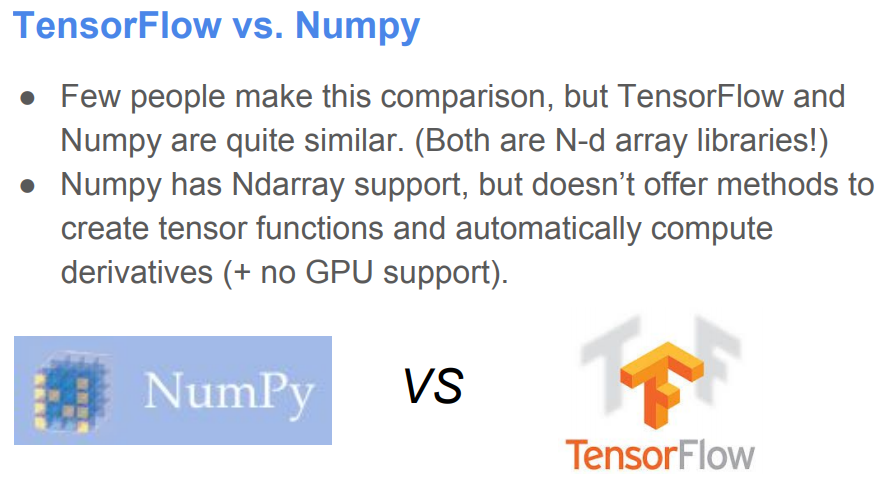
   

### session
* A Session object encapsulates the environment in which Operation objects are executed, and Tensor objects are evaluated. 
* tf.InteractiveSession() is just convenient syntactic sugar for keeping a default session open in ipython.
*  sess.run(c) is an example of a TensorFlow Fetch.
* sess.close()

EX 1: The tf.add() has three arugments 'x', 'y', and 'name' where x and y are the values to be added together and name is the operation name, i.e. the name associated to the addition node on the graph.

In [34]:
import tensorflow as tf

In [40]:
a1 = 2
b1 = 3
c1 = tf.add(a1,b1,name='Add')
with tf.Session() as sess:
    print(c1.eval())

5


In [5]:
sess = tf.Session()
print(sess.run(c1))
sess.close()

5


The following code does the same thing and is more commonly used. The only difference is that there is no need to close the session at the end as it gets closed automatically.

In [66]:
with tf.Session() as sess:
    print(sess.run(c))

5


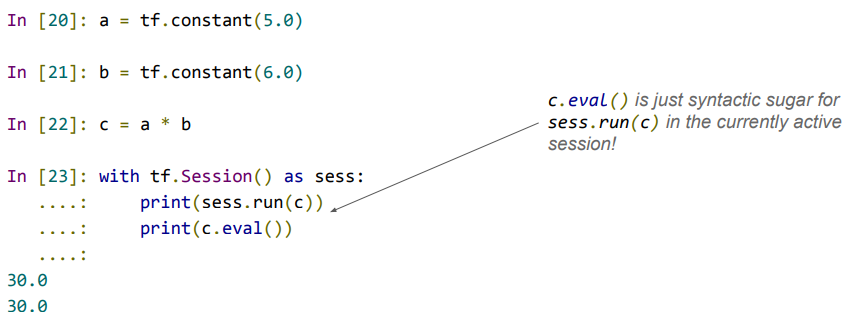

In [12]:
# Example 2: Creating  with multiple math operations
x = 2
y = 3
add_op = tf.add(x, y, name='Add')
mul_op = tf.multiply(x, y, name='Multiply')
pow_op = tf.pow(add_op, mul_op, name='Power')
useless_op = tf.multiply(x, add_op, name='Useless')

with tf.Session() as sess:
        pow_out, useless_out = sess.run([pow_op, useless_op])

In [14]:
print(pow_out)
print(useless_out)

15625
10


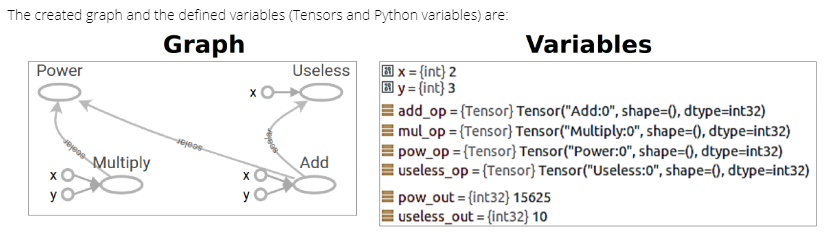

In [17]:
import numpy as np
a = np.zeros((2,2)); b = np.ones((2,2))
print(a)
print(b)
print(np.sum(b, axis=1))
print(a.shape)
np.reshape(a, (1,4))

[[0. 0.]
 [0. 0.]]
[[1. 1.]
 [1. 1.]]
[2. 2.]
(2, 2)


array([[0., 0., 0., 0.]])

In [17]:
# Repeat in TensorFlow
import tensorflow as tf
sess=tf.InteractiveSession()
a = tf.zeros((2,2)); b = tf.ones((2,2))
tf.reduce_sum(b, reduction_indices=1).eval()
a.get_shape()
sess.close()

In [18]:
# TensorFlow requires explicit evaluation!
a.eval()

array([[0., 0.],
       [0., 0.]], dtype=float32)

In [10]:
 tf.reshape(a, (1, 4)).eval()

array([[0., 0., 0., 0.]], dtype=float32)

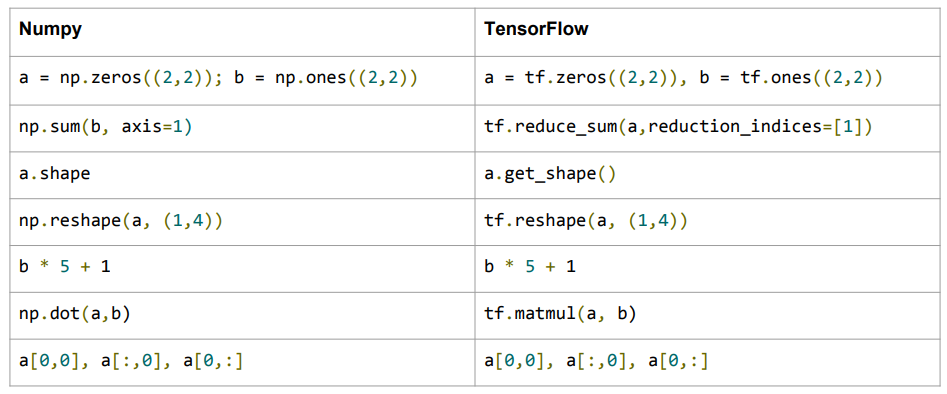

In [25]:
sess = tf.InteractiveSession()
X = tf.constant(np.eye(4))
print(X.eval())
Y = tf.constant(np.arange(12.0).reshape(4,3))
print(Y.eval())
Z = tf.matmul(X, Y)
print(Z.eval())
sess.close()

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]
 [ 9. 10. 11.]]
[[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]
 [ 9. 10. 11.]]


Inputting Data
● We can  manually define tensors OR  Simple solution: Import from Numpy: as above

In [42]:
a = np.zeros((3,3))
ta = tf.convert_to_tensor(a)
with tf.Session() as sess:
    print(sess.run(ta))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


#### Placeholder

Placeholders are nodes whose values are fed in at the execution time. They are generally used for feeding in inputs and the labels. While declaring Placeholders, we only assign datatype and shape of the tensor.

Use tf.placeholder variables (dummy nodes that provide entry points for data to computational graph).
* Use tf.placeholder variables (dummy nodes that provide entry points for data to computational graph).
* A feed_dict is a python dictionary mapping from tf.placeholder vars (or their names) to data (numpy arrays, lists, etc.).

#### placeholder and feed_dict
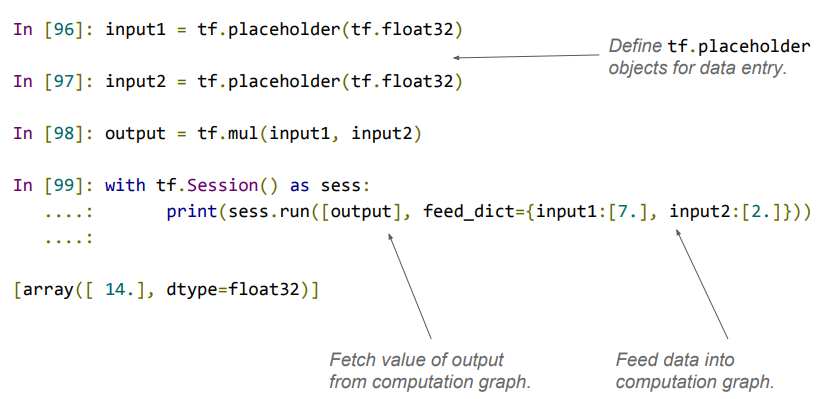

In [68]:
pi = tf.constant(3.14, name="pi") ## Note tf.constant
r = tf.placeholder(tf.float32, name="r")
    
a = pi * r * r

with tf.Session() as sess:
    print(a.eval({r: [5]}))

[78.5]


In [67]:
sess=tf.Session()
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)
z=x+y
print(sess.run(z,feed_dict={x: 10.0, y:20.0})) 

30.0


#### Note: Placeholders  and Variables are two basic programming elements of TensorFlow.
* Placeholders are used to feed external data into a TensorFlow graph. It allows a value to be assigned later i.e. a place in the memory where we’ll store a value later on. To define a Placeholder we use tf.placeholder() command.


* Variables are used to store the state of a graph. Variables need a value to be initialized while declaring it. To declare a variable we use tf.Variable() command and initialize them before running the graph in a session.
      >>  b = tf.Variable([0.5],dtype=tf.float32)
      


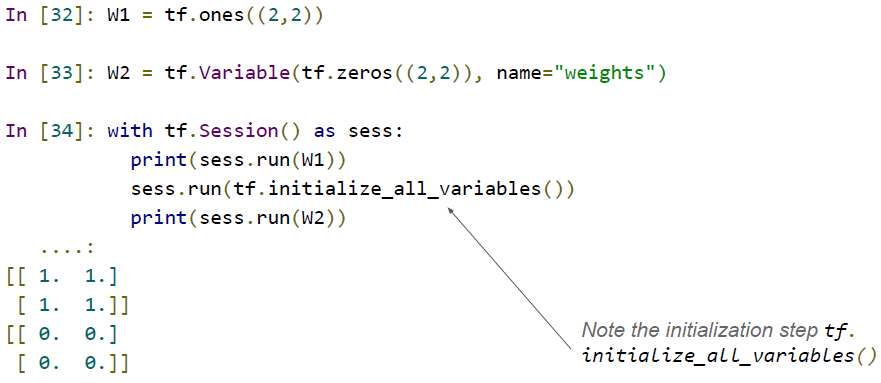

###### TensorFlow variables must be initialized before they have values! Contrast with constant tensors.
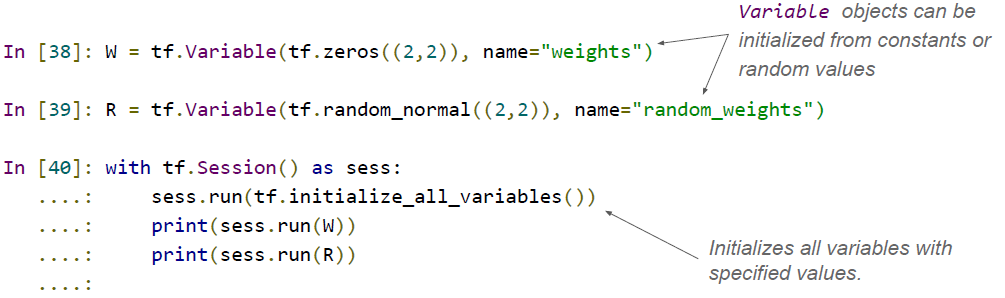

#### Updating Variable state
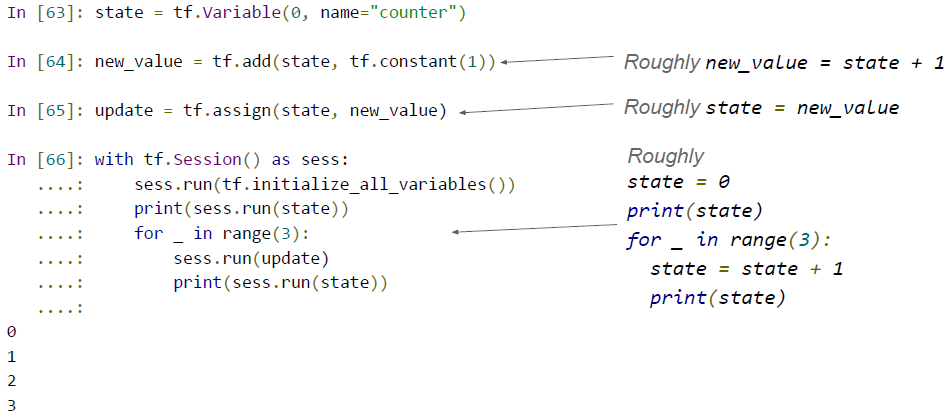

##### Note:
* tf.initialize_all_variables()> deprecated  and removed
* Use> tf.global_variables_initializer()

##### Fetcching Variable state
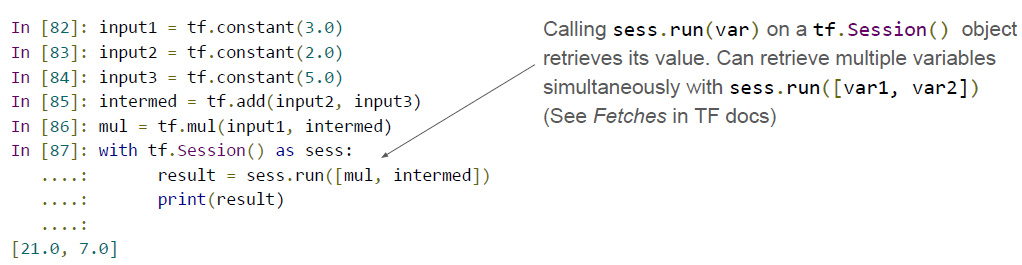

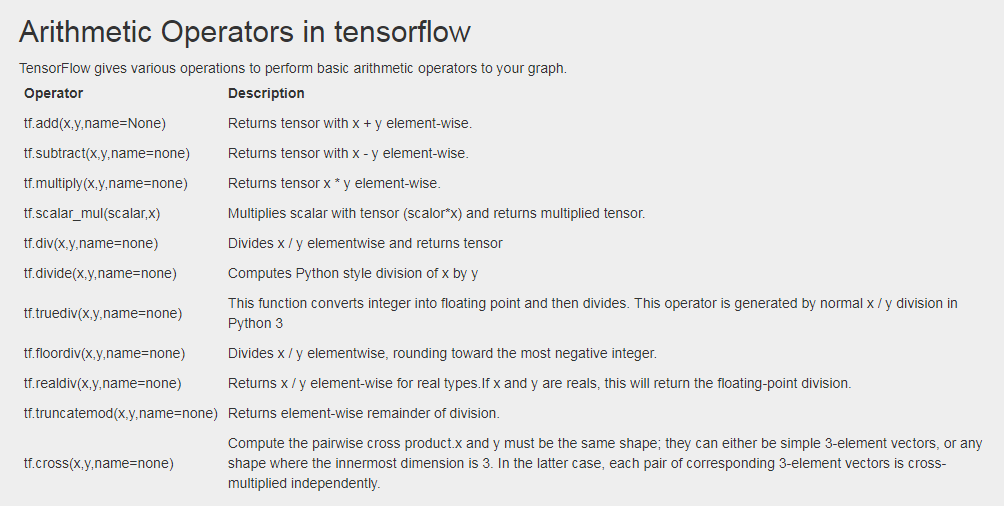

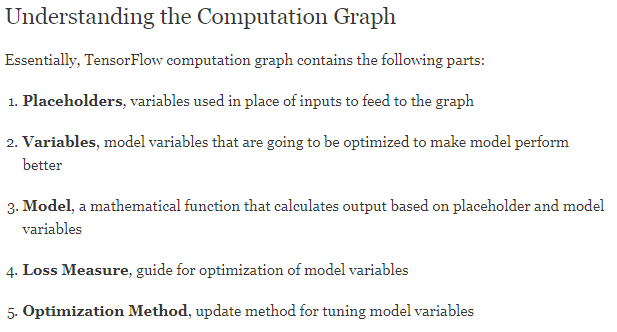

### Linear Regression in tensorflow using optimizer
* Gradient Desceent Optimizer 
* Momentum Optimizer

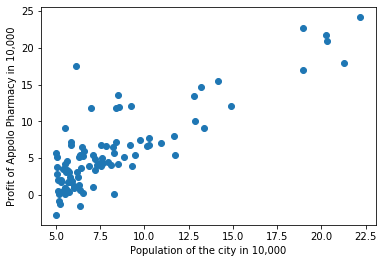

In [18]:
## Improting data using pandas and plotting 
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('ex1data1.txt',header=None)#Data is available in folder ML using ML library
data.head()
Xs=np.array(data.iloc[:,0])#.values
Ys=np.array(data.iloc[:,1])#.values
plt.scatter(Xs,Ys)
plt.xlabel('Population of the city in 10,000')
plt.ylabel('Profit of Appolo Pharmacy in 10,000')
plt.show()

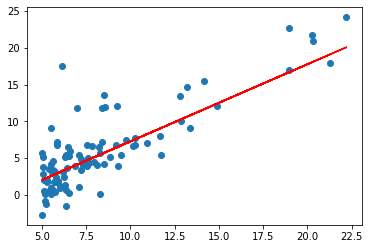

In [50]:
learning_rate = 0.001 # 0.01 for MomentumOptimizer 
#0.01 for GradientDescentOptmizer 
# steps of looping through all your data to update the parameters
training_epochs = 100
# a training set
x_train = Xs
y_train = Ys
# set up placeholders for input and output
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
# Define h(x) = x*w1 + w0
def h(X, w1, w0):
       return tf.add(tf.multiply(X, w1), w0)
# set up variables for weights
w0 = tf.Variable(0.0, name="weights")
w1 = tf.Variable(0.0, name="weights")
y_predicted = h(X, w1, w0)
# Define the cost function
costF = 0.5*tf.square(Y-y_predicted)
# Define the operation that will be called on each iteration
#train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(costF)
train_op = tf.train.MomentumOptimizer(learning_rate=learning_rate,momentum=0.9).minimize(costF)
#All variables initialized at once> tf.global_variables_initializer()
# Must be run after the model being fully constructed.
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
# Loop through the data training
for epoch in range(training_epochs):
       for (x, y) in zip(x_train, y_train):
              sess.run(train_op, feed_dict={X: x, Y: y})
# get values of the final weights
w_val_0 = sess.run(w0)
w_val_1 = sess.run(w1)
sess.close()
# plot the data training
plt.scatter(x_train, y_train)
# plot the best fit line
y_learned = x_train*w_val_1 + w_val_0
plt.plot(x_train, y_learned, 'r')
plt.show()

#### BEST OF LUCK! HAPPY LEARNING!!